In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
# Importar datos
data = pd.read_csv("usuarios_win_mac_lin.csv")
data.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


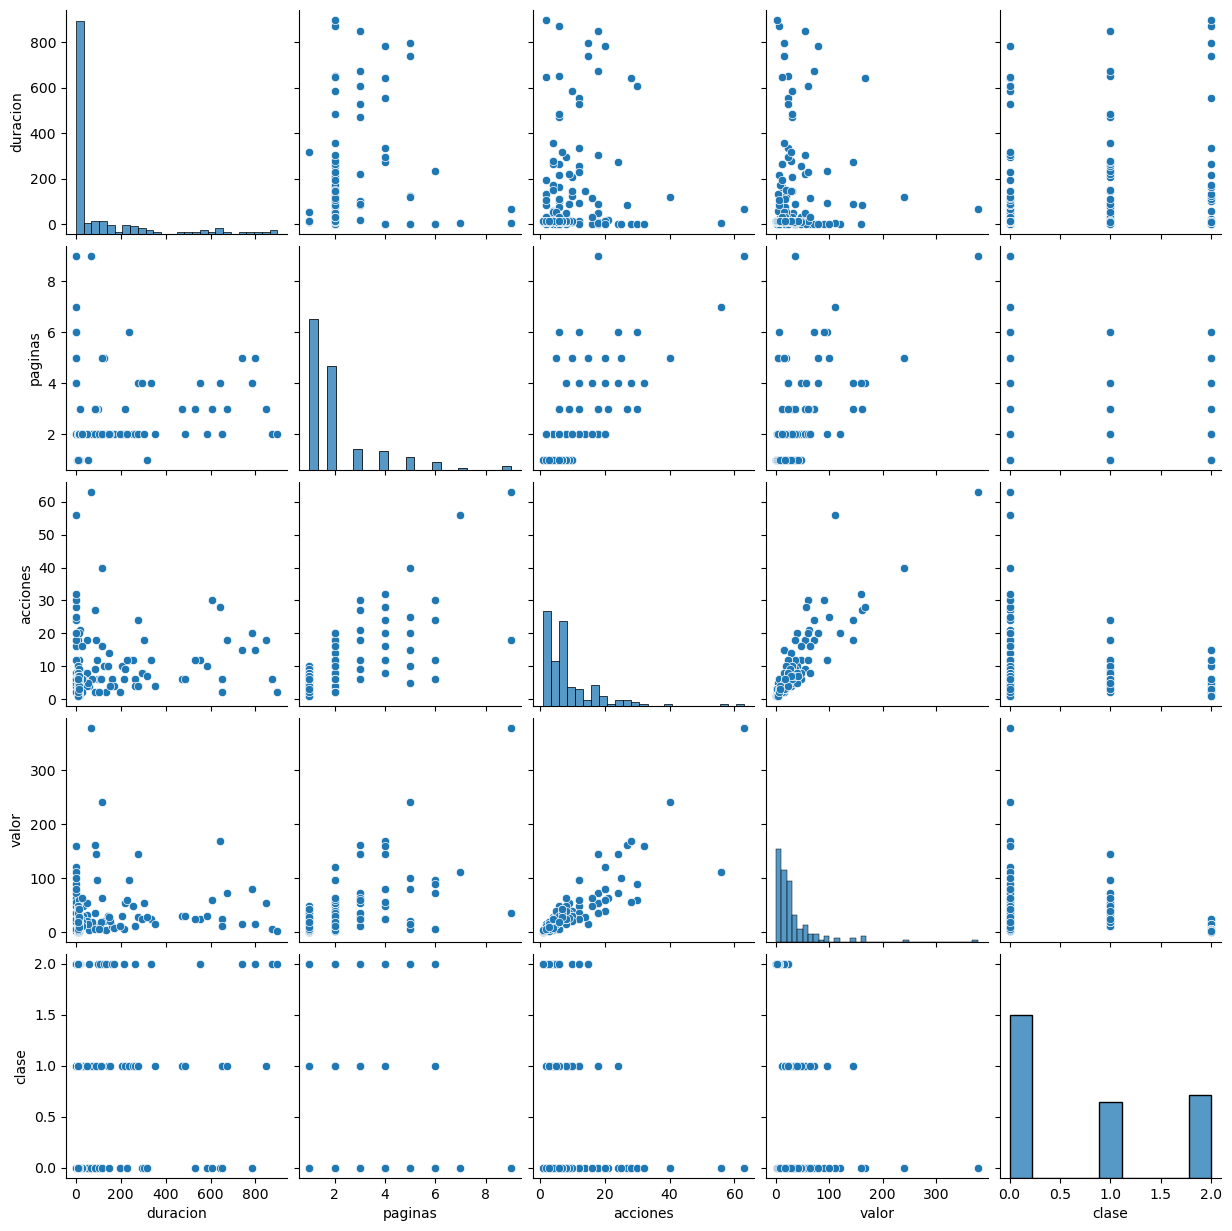

In [5]:
sns.pairplot(data)
plt.show()

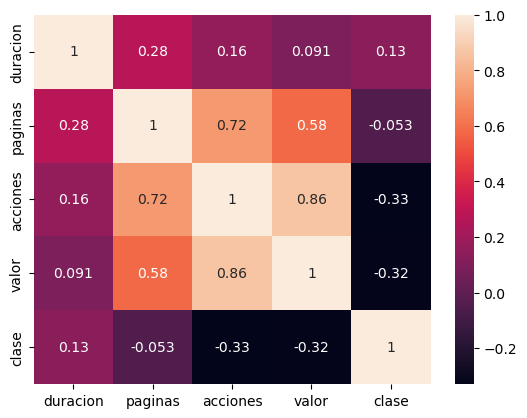

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('duracion', axis=1), data['paginas'], test_size=0.3)

# Calcular matriz de correlación
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)


In [11]:
selected_features = set(data.columns) - high_corr_features
selected_features = list(selected_features)[0]

In [12]:
model = LinearRegression()
model.fit(X_train[selected_features].values.reshape(-1,1), y_train)

LinearRegression()

In [16]:
score = model.score(X_test[selected_features].values.reshape(-1,1), y_test)
print("Rendimiento en conjunto de prueba:", score*100)

Rendimiento en conjunto de prueba: 73.74477900153632
